<a href="https://colab.research.google.com/github/HGOYALMQF27/Numerical-Analysis-Project/blob/main/Numerical_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mplfinance

In [ ]:
pip install arch

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.interpolate import interp1d, BSpline
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import plotly.express as px
import mplfinance as mpf
from statsmodels.tsa.arima.model import ARIMA
import itertools
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
tickers = ['LSCC']

In [ ]:
start_date = '2018/04/01'
end_date = datetime.today().strftime('%Y-%m-%d')
#df_prices = pd.DataFrame()

In [ ]:
# Fetch historical prices of LSCC(Russell 2000) instrument using yfinane
symbol = "LSCC"
start_date = "2018-04-01"
end_date = "2023-04-01"
data = yf.download(symbol, start=start_date, end=end_date)
print(data.head())
dates = data.index.values
print(dates)
prices = data['Adj Close'].values
print(prices)

#print(type(prices))
# Using Close Price
# def datafromYahoo(dataframe,ticker_list,start,finish):
#     for i in ticker_list:
#         current_ticker = yf.Ticker(i)
#         dataframe[i] = (current_ticker.history(period='5y')[['Close']])
#     return dataframe
# df = datafromYahoo(df_prices,tickers,start_date,end_date)
# df.head

[*********************100%***********************]  1 of 1 completed
            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2018-04-02  5.57  5.59  5.40   5.44       5.44  714300
2018-04-03  5.50  5.52  5.39   5.45       5.45  518900
2018-04-04  5.35  5.47  5.35   5.45       5.45  553500
2018-04-05  5.47  5.50  5.41   5.43       5.43  392200
2018-04-06  5.38  5.46  5.20   5.23       5.23  840000
['2018-04-02T00:00:00.000000000' '2018-04-03T00:00:00.000000000'
 '2018-04-04T00:00:00.000000000' ... '2023-03-29T00:00:00.000000000'
 '2023-03-30T00:00:00.000000000' '2023-03-31T00:00:00.000000000']
[ 5.44000006  5.44999981  5.44999981 ... 93.59999847 94.5
 95.5       ]


[*********************100%***********************]  1 of 1 completed


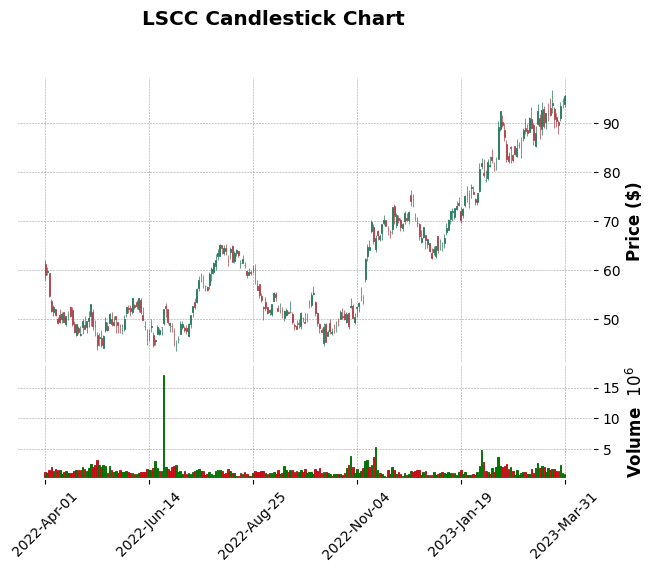

In [ ]:
# Candle Stick Chart for LSCC
lscc = yf.download('LSCC', start='2022-04-01', end=end_date)
mpf.plot(lscc, type='candle', volume=True, style='charles', title='LSCC Candlestick Chart', ylabel='Price ($)')

In [ ]:
# Stock price chart with price projection

fig_price = px.line(prices, title='LSCC Stock Chart')
fig_price.show()

In [ ]:
# Creat a Linear Spline interpolation function
linear_interp = interp1d(range(len(prices)), prices, kind="linear")

# Evaluate the linear spline function at a high resolution set of points
num_eval_points = 100
eval_points = np.linspace(0, len(prices) - 1, num_eval_points)
spline_values = linear_interp(eval_points)

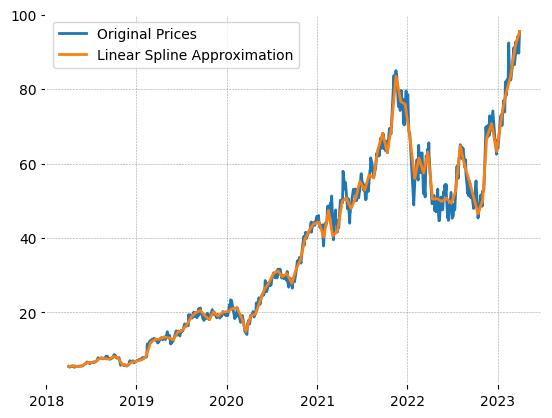

In [ ]:
# Plot the original prices and the linear spline interpolation
plt.plot(dates, prices, label = "Original Prices")
plt.plot(dates[eval_points.astype(int)], spline_values, label="Linear Spline Approximation")
plt.legend()
plt.show()

In [ ]:
# Create a quadratic spline interpolation function
quadratic_interp = interp1d(range(len(prices)), prices, kind="quadratic")

# Evaluate the quadratic spline function at a high-resolution set of points
num_eval_points_q = 100
eval_points_q = np.linspace(0, len(prices) - 1, num_eval_points_q)
spline_values_q = quadratic_interp(eval_points_q)

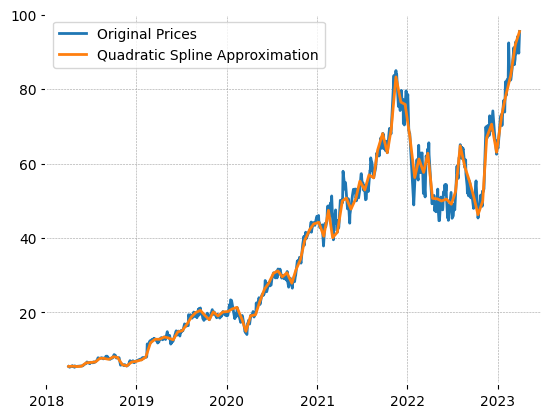

In [ ]:
# Plot the original prices and the quadratic spline approximation
plt.plot(dates, prices, label="Original Prices")
plt.plot(dates[eval_points_q.astype(int)], spline_values_q, label="Quadratic Spline Approximation")
plt.legend()
plt.show()

In [ ]:
# Create a cubic spline interpolation function
cubic_interp = interp1d(range(len(prices)), prices, kind="cubic")

# Evaluate the quadratic spline function at a high-resolution set of points
num_eval_points_c = 100
eval_points_c = np.linspace(0, len(prices) - 1, num_eval_points_c)
spline_values_c = cubic_interp(eval_points_c)

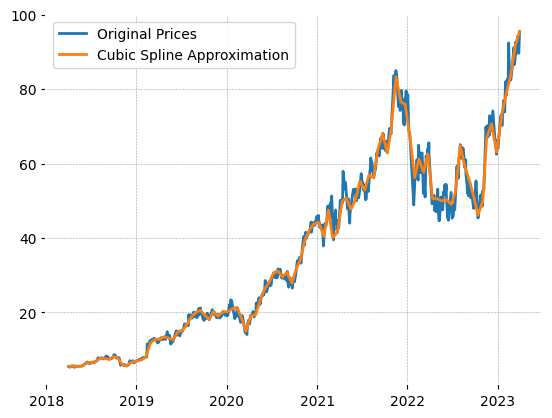

In [ ]:
# Plot the original prices and the cubic spline approximation
plt.plot(dates, prices, label="Original Prices")
plt.plot(dates[eval_points_c.astype(int)], spline_values_c, label="Cubic Spline Approximation")
plt.legend()
plt.show()

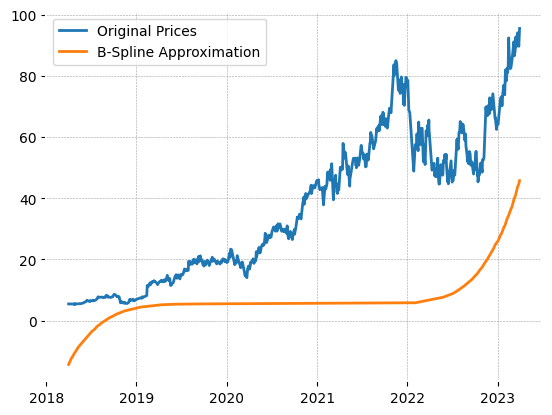

In [ ]:
# B-spline Approximation
num_knots = 15

# Create a set of uniformly spaced knots along the range of x values
knots = np.linspace(0, len(prices) - 1, num_knots)

# Degree of B-spline to use
degree = 5
# Create a B-spline interpolation function
bspline_interp = BSpline(knots, prices, degree)

# Evaluate the B-spline function at a high-resolution set of points
num_eval_points = 1000
eval_points_bs = np.linspace(0, len(prices) - 1, num_eval_points)
spline_values_bs = bspline_interp(eval_points_bs)

# Plot the original prices and the B-spline approximation
#import matplotlib.pyplot as plt
plt.plot(dates, prices, label="Original Prices")
plt.plot(dates[eval_points_bs.astype(int)], spline_values_bs, label="B-Spline Approximation")
plt.legend()
plt.show()

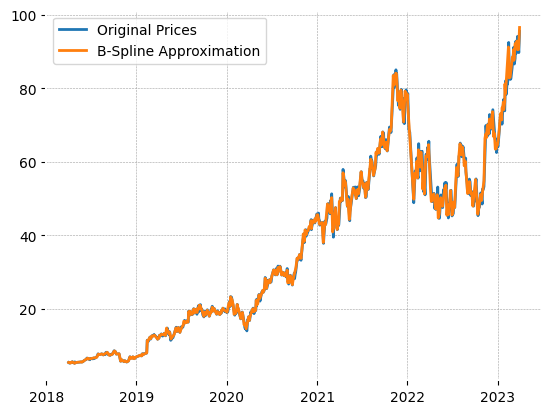

In [ ]:
# B-spline Approximation
num_knots = 1262

# Create a set of uniformly spaced knots along the range of x values
knots = np.linspace(0, len(prices) - 1, num_knots)

# Degree of B-spline to use
degree = 1
# Create a B-spline interpolation function
bspline_interp = BSpline(knots, prices, degree)

# Evaluate the B-spline function at a high-resolution set of points
num_eval_points = 1000
eval_points_bs = np.linspace(0, len(prices) - 1, num_eval_points)
spline_values_bs = bspline_interp(eval_points_bs)

# Plot the original prices and the B-spline approximation
#import matplotlib.pyplot as plt
plt.plot(dates, prices, label="Original Prices")
plt.plot(dates[eval_points_bs.astype(int)], spline_values_bs, label="B-Spline Approximation")
plt.legend()
plt.show()

In [ ]:
rmse_l = mean_squared_error(prices, linear_interp(prices), squared=False)
rmse_q = mean_squared_error(prices, quadratic_interp(prices), squared=False)
rmse_c = mean_squared_error(prices, cubic_interp(prices), squared=False)
rmse_b = mean_squared_error(prices, bspline_interp(prices), squared=False)

In [ ]:
# Converting prices array to DataFrame for future use.

df_prices = pd.DataFrame(prices)
print(df_prices)

# Define the range of p,d and q values to try
p_values = range(0,3)
d_values = range(0,2)
q_values = range(0,3)

# Initialize variables for best AIC score and corresponding p,d,q values
best_score, best_cfg = float("inf"), None

# Loop over all combinations of p,d,q values and fit the ARIMA model

for p in p_values:
  for d in d_values:
    for q in q_values:
      order = (p,d,q)
      try:
        model = ARIMA(df_prices, order = order)
        results = model.fit()
        aic = results.aic

        if aic < best_score:
          best_score, best_cfg = aic, order
        print(f'ARIMA{order} AIC={aic:.2f}')
      except:
        continue

# Print the best AIC score and p,d,q values
print(f'Best ARIMA{best_cfg} AIC={best_score:.2f}')


              0
0      5.440000
1      5.450000
2      5.450000
3      5.430000
4      5.230000
...         ...
1255  90.440002
1256  89.669998
1257  93.599998
1258  94.500000
1259  95.500000

[1260 rows x 1 columns]
ARIMA(0, 0, 0) AIC=11576.06
ARIMA(0, 0, 1) AIC=9917.35
ARIMA(0, 0, 2) AIC=8673.79
ARIMA(0, 1, 0) AIC=4396.17
ARIMA(0, 1, 1) AIC=4397.08
ARIMA(0, 1, 2) AIC=4398.87


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



ARIMA(1, 0, 0) AIC=4410.12


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



ARIMA(1, 0, 1) AIC=4411.09


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



ARIMA(1, 0, 2) AIC=4412.91
ARIMA(1, 1, 0) AIC=4397.10
ARIMA(1, 1, 1) AIC=4398.69


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(1, 1, 2) AIC=4400.68


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



ARIMA(2, 0, 0) AIC=4411.12


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



ARIMA(2, 0, 1) AIC=4409.47


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2, 0, 2) AIC=4408.17
ARIMA(2, 1, 0) AIC=4398.91
ARIMA(2, 1, 1) AIC=4400.68


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2, 1, 2) AIC=4391.45
Best ARIMA(2, 1, 2) AIC=4391.45


[63.05214881 62.45810319 62.33036306 63.00614749 62.51806926 62.31977545
 62.95908001 62.57045517 62.31702141 62.9121122  62.61535701 62.32091391
 62.86622248 62.65301403 62.33031394 62.82221087 62.68378083 62.34414695
 62.78071047 62.70810146 62.3614154  62.74220058 62.72648587 62.3812076
 62.70702098 62.73948857 62.40270337 62.67538696 62.74768986 62.42517684
 62.64740451 62.75167944 62.44799686 62.62308547 62.75204238 62.47062526
 62.60236228 62.74934755 62.49261351 62.58510196 62.7441381  62.51359789
 62.57111939 62.73692406 62.53329379 62.56018949 62.72817682 62.55148911
 62.55205834 62.71832527 62.56803723 62.54645313 62.70775353 62.58284971
 62.54309097 62.69679987 62.5958889  62.54168645 62.68575688 62.6071607
 62.54195807 62.67487252 62.61670746 62.54363364 62.66435199 62.62460132
 62.5464545  62.65436015 62.63093795 62.55017885 62.64502447 62.63583076
 62.55458423 62.63643825 62.63940572 62.55946912 62.62866412 62.64179664
 62.56465388 62.62173754 62.64314115 62.56998109 62.6

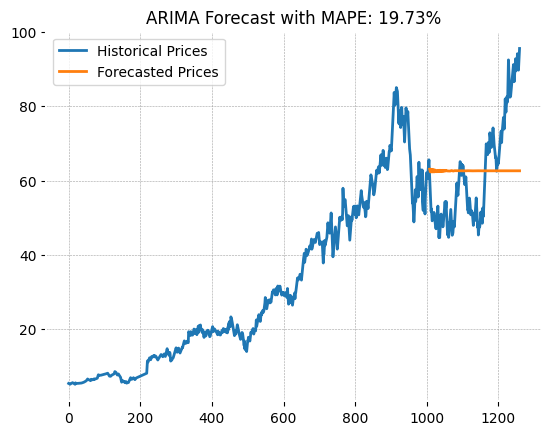

In [ ]:
# Forecasting the future prices of LSCC Stock using ARIMA model.

# Split the data into training and testing sets
train_size = int(len(prices)*0.8)
train_data, test_data = prices[:train_size], prices[train_size:]

# Fit an ARIMA model to the training data
model = ARIMA(train_data, order=(2,1,2))
model_fit = model.fit()
#print(model_fit.summary())

# Forecast the future prices using the fitted model
num_forecast_periods = len(test_data)
forecast = model_fit.forecast(steps = num_forecast_periods)
print(forecast)

# Calculate the mean absolute percentage error (MAPE) of the forecast
mape = np.mean(np.abs((test_data - forecast)/test_data))*100
mae = np.mean(np.abs(forecast - test_data))
rmse = np.sqrt(np.mean((forecast - test_data) ** 2))

print("MAPE: ", mape)
print("MAE: ", mae)
print("RMSE: ", rmse)

#Plot the historical prices and the forecasted prices
plt.plot(prices, label="Historical Prices")
plt.plot(range(train_size, train_size+num_forecast_periods), forecast, label="Forecasted Prices")
plt.title(f"ARIMA Forecast with MAPE: {mape:.2f}%")
plt.legend()
plt.show()

# Print this array of orange

In [ ]:
# Code to find existence of seasonality
results_df = sm.tsa.stattools.adfuller(df_prices)
print('ADF Statistic:',  results_df[0])
print('p-value:', results_df[1])

# p-value is greater than. 0.05, then the data is not stationary. Hence we can apply SARIMA modeling to the data.

ADF Statistic: 0.26550382253123384
p-value: 0.9757052741332479


In [ ]:
# define parameter for ranges for SARIMA model
p_s = range(0,2)
d_s = range(0,2)
q_s = range(0,2)
P = range(0,2)
D = range(0,1)
Q = range(0,2)
s = 12
pdq = list(itertools.product(p_s,d_s,q_s))
seasonal_pdq = list(itertools.product(P,D,Q,[s]))

# Fit a range of SARIMA models and select the one with the lowest AIC score
min_aic_sarima = float('inf')
best_model_sarima = None
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      model_sarima = sm.tsa.statespace.SARIMAX(df_prices, order=param, seasonal_order = param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
      results_sarima = model_sarima.fit()
      if results_sarima.aic < min_aic_sarima:
        min_aic_sarima = results_sarima.aic
        best_model_sarima = results_sarima
    except:
      continue

# Print the best model and its AIC score
print("Best model:", best_model_sarima.summary())
print("AIC Score:", min_aic_sarima)

Best model:                                      SARIMAX Results                                      
Dep. Variable:                                  0   No. Observations:                 1260
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -2179.032
Date:                            Thu, 13 Apr 2023   AIC                           4364.064
Time:                                    01:26:48   BIC                           4379.445
Sample:                                         0   HQIC                          4369.847
                                           - 1260                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0299      0.019     -1.547      0.122      -0.068       0.008
ma.S.L12      -0.0033  

[62.53143011 62.65117734 62.71515204 62.78078265 62.75825346 62.77660942
 62.73886801 62.86079377 62.79832046 62.84384767 62.92503141 62.80876655
 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011
 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011
 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011
 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011
 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011
 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011
 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011
 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011
 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011
 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011
 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011 62.80954011
 62.80954011 62.80954011 62.80954011 62.80954011 62

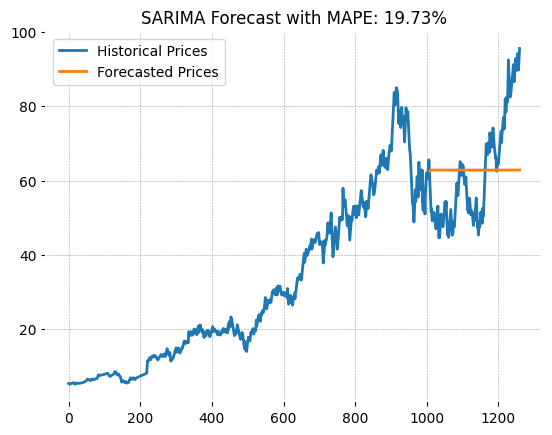

In [ ]:
# Forecasting the future prices of LSCC Stock using SARIMA model.
# Split the data into training and testing sets
train_size_sa = int(len(prices)*0.8)
train_data_sa, test_data_sa = prices[:train_size_sa], prices[train_size_sa:]
num_forecast_periods = len(test_data_sa)

# Fit SARIMA model to training data
order_sa = (0,1,1) # SARIMA order
seasonal_order_sa = (0,0,1,12) # Seasonal order
model_sa = sm.tsa.statespace.SARIMAX(train_data_sa, order = order_sa, seasonal_order = seasonal_order_sa)
fitted_model_sa = model_sa.fit()

# Forecast the future prices using the fitted model
num_forecast_periods_sa = len(test_data_sa)
forecast_sa = fitted_model_sa.forecast(steps = num_forecast_periods_sa)
print(forecast_sa)

# Evaluate model performance
# Calculate the mean absolute percentage error (MAPE) of the forecast
mape_sa = np.mean(np.abs((test_data_sa - forecast_sa)/test_data_sa))*100
mae_sa = np.mean(np.abs(forecast_sa - test_data_sa))
rmse_sa = np.sqrt(np.mean((forecast_sa - test_data_sa) ** 2))
print("MAPE: ", mape_sa)
print("MAE: ", mae_sa)
print("RMSE: ", rmse_sa)

#Plot the historical prices and the forecasted prices
plt.plot(prices, label="Historical Prices")
plt.plot(range(train_size_sa, train_size_sa+num_forecast_periods_sa), forecast_sa, label="Forecasted Prices")
plt.title(f"SARIMA Forecast with MAPE: {mape:.2f}%")
plt.legend()
plt.show()


In [ ]:
# GARCH model implementation
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arch as arch
from arch import arch_model


In [ ]:
ticker = 'LSCC'
data_garch = yf.download(ticker, start="2018-04-01", end="2023-04-01")
returns_garch = data_garch['Adj Close'].pct_change().dropna()


[*********************100%***********************]  1 of 1 completed


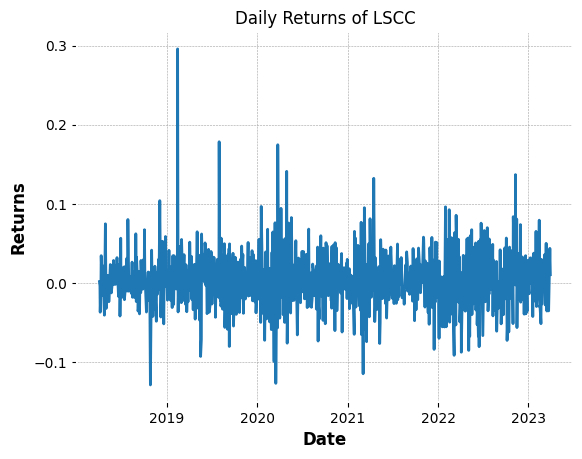

In [ ]:
plt.plot(returns_garch)
plt.title('Daily Returns of LSCC')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()


In [ ]:
model_garch = arch_model(returns_garch, vol='GARCH', p=1, q=1)
results_garch = model_garch.fit(disp='off')
print(results_garch.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2523.91
Distribution:                  Normal   AIC:                          -5039.81
Method:            Maximum Likelihood   BIC:                          -5019.26
                                        No. Observations:                 1259
Date:                Thu, Apr 13 2023   Df Residuals:                     1258
Time:                        01:27:14   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         3.0350e-03  8.388e-04      3.618  2.967e-04 [1.

/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:310: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001104. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [ ]:
forecast_horizon_garch = 50
forecasts_garch = results_garch.forecast(start='2018-04-01', horizon = forecast_horizon_garch, reindex = False)
print(forecasts_garch)

# Extract the forecasted volatility and mean values
forecasted_volatility = np.sqrt(forecasts_garch.variance.values[-1, :])
print(forecasted_volatility)
forecasted_mean = forecasts_garch.mean.values[-1, :]
print(forecasted_mean)

[0.03061268 0.03071415 0.03081183 0.03090587 0.03099641 0.0310836
 0.03116756 0.03124843 0.03132634 0.03140139 0.03147369 0.03154336
 0.03161049 0.03167519 0.03173755 0.03179765 0.03185558 0.03191143
 0.03196527 0.03201718 0.03206723 0.03211549 0.03216202 0.0322069
 0.03225018 0.03229192 0.03233217 0.032371   0.03240846 0.03244459
 0.03247944 0.03251306 0.0325455  0.03257679 0.03260699 0.03263612
 0.03266422 0.03269135 0.03271752 0.03274277 0.03276714 0.03279065
 0.03281335 0.03283525 0.03285638 0.03287678 0.03289647 0.03291547
 0.03293381 0.03295151]
[0.00303498 0.00303498 0.00303498 0.00303498 0.00303498 0.00303498
 0.00303498 0.00303498 0.00303498 0.00303498 0.00303498 0.00303498
 0.00303498 0.00303498 0.00303498 0.00303498 0.00303498 0.00303498
 0.00303498 0.00303498 0.00303498 0.00303498 0.00303498 0.00303498
 0.00303498 0.00303498 0.00303498 0.00303498 0.00303498 0.00303498
 0.00303498 0.00303498 0.00303498 0.00303498 0.00303498 0.00303498
 0.00303498 0.00303498 0.00303498 0.0030

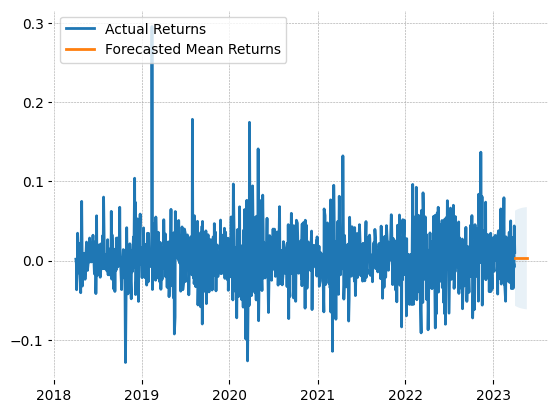

In [ ]:
#Plot the actual returns
plt.plot(returns_garch.index, returns_garch, label='Actual Returns')

# Plot the forecasted mean returns
forecast_index = pd.date_range(start='2023-04-01', periods=forecast_horizon_garch, freq='D')
plt.plot(forecast_index, forecasted_mean, label='Forecasted Mean Returns')

# Plot the upper and lower bounds of the forecasted returns
plt.fill_between(forecast_index, forecasted_mean-1.96*forecasted_volatility,
                 forecasted_mean+1.96*forecasted_volatility, alpha=0.1)

plt.legend(loc='upper left')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df_prices

RangeIndex(start=0, stop=1, step=1)

In [ ]:
# Preprocess the data
data = prices
data = (data - np.min(data)) / (np.max(data) - np.min(data))
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Define the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the neural network model
model.fit(train_data[:-1], train_data[1:], epochs=50, batch_size=16, verbose=0)

# Evaluate the model
mse = model.evaluate(test_data[:-1], test_data[1:], verbose=0)
rmse = np.sqrt(mse)
print('RMSE: %.4f' % rmse)

# Make predictions
predictions = model.predict(test_data[:-1])

RMSE: 0.0226
8/8 [==============================] - 0s 2ms/step


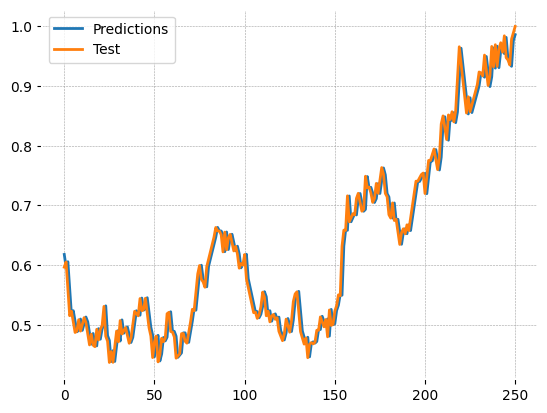

In [ ]:
# Plot the predictions and test data
plt.plot(predictions, label='Predictions')
plt.plot(test_data[1:], label='Test')
plt.legend()
plt.show()